# SI 618 - Homework #3: Data Visualization

Version 2022.01.30.1.CT

## Background

This homework assignment focuses on the visual analysis of the COVID-19 data avaiable here: https://covid19datahub.io/articles/api/python.html. A description of the dataset can be found at https://covid19datahub.io/articles/doc/data.html

Your main task in this assignment is to explore the data *using the data manipulation, analysis, and visualization methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas, matplotlib and seaborn documentation, as well as Stack Overflow, or other online resources.  

## Total Points and Rubric

Each question is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in 
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

## Getting the data


The following cell should install the most up-to-date version of the 
COVID-19 datahub.  Alternatively, you can consult the datahub documentation to download the data files directly.

In [1]:
pip install --upgrade covid19dh

Note: you may need to restart the kernel to use updated packages.


### Restart the kernel to import the module and access the data

In [2]:
from covid19dh import covid19

## Answer the questions below. 
For each question, you should
1. Write code that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

In [3]:
# Load all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <font color='#8B0000'> Q1 How many different countries are represented in the country-level data set?</font>
- Refer to the documentation to call the covid19() function with appropriate parameters (https://covid19datahub.io/articles/api/python.html)

In [25]:
# insert your code here
covid, src = covid19()

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


In [122]:
covid.columns
len(covid['administrative_area_level_1'].unique())

236

This is the only thing I can find that might relate to countries. It shows there are altogether 236 administrative areas. I do not think these areas listed are all countries. For example Hongkong and Taiwan is listed in, but since I find that the document treat this like a country, I will do it so.

### <font color='#8B0000'> Q2 Create a line chart that shows the total number of cases over time.</font>

In [66]:
covid.groupby('date').confirmed.sum()

date
2020-01-01            0.0
2020-01-02            1.0
2020-01-03            0.0
2020-01-04            1.0
2020-01-05            1.0
                 ...     
2022-02-03    340971200.0
2022-02-04    340351609.0
2022-02-05    328677545.0
2022-02-06    307074227.0
2022-02-07      8767450.0
Name: confirmed, Length: 769, dtype: float64

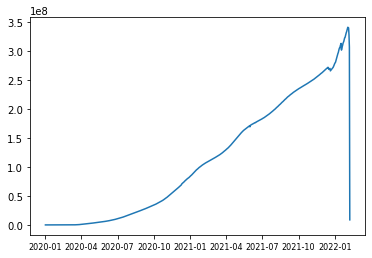

In [71]:
# put your code here
plt.plot(covid.groupby('date').confirmed.sum())
plt.xticks(fontsize = 8)
plt.show()

I grounp the data with date and use sum function to check the total number of the confirmed cases.\
I did the homework on 2/7 at around 11 am, and it seems that the cases of that day have not been recorded completely. That's the reason that there is a large dive of the data.

### <font color='#8B0000'>Q3 Use the country-level data set to create a histogram to:</font>
- Show the distribution of values for the number of hospitalizations per 1000 people.  
- Draw a red vertical line that shows the median value on the histogram.

I would use the data of yesterday, and divide the hist with the administrative area.

In [114]:
from datetime import date
covid_yes, src = covid19(start = date(2022,2,6), end = date(2022,2,6))

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


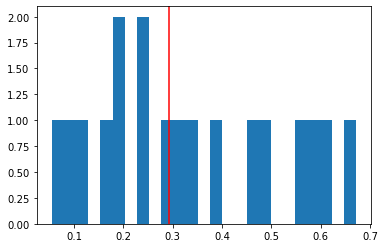

In [119]:
covid_yes['hosp_1000'] = covid_yes['hosp']*1000/covid_yes['population']
covid_yes_notna = covid_yes[~covid_yes['hosp_1000'].isna()]
plt.hist(covid_yes_notna['hosp_1000'], bins=25)
plt.axvline(x = covid_yes_notna['hosp_1000'].median(), color='red')
plt.show()

I use the data of yesterday, which is 2022-02-05. Then I divide the dateset according to the administrative area, and calculate the hospitalization per 1000 people as hosp\*1000/population.

### <font color='#8B0000'> Q4 Create a visualization that shows the  number of tests per day in the United States and indicate the median value on your visualization.</font>

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


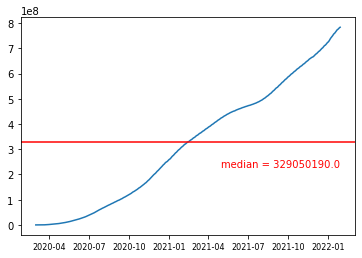

In [139]:
# put your code here
covid_usa, src = covid19('USA')
plt.plot(covid_usa['date'],covid_usa['tests'])
plt.xticks(fontsize=8)
plt.axhline(y=covid_usa['tests'].median(),color='red')
plt.text(date(2021,5,1), covid_usa['tests'].median()-100000000, 'median = '+str(covid_usa['tests'].median()), color='red')
plt.show()

I plot the linear line of the test case in usa, and draw the horizontal line of the median with the text of number of the median of the test cases.

## For questions below:
- You will have to call the covid19() function again **with parameters specific to Canada**. 
- Set the parameter <code>level = 2</code> in the call to covid19().

In [140]:
canada,src = covid19("CAN",level = 2)

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


In [141]:
canada.tail()

id       date  confirmed  deaths  recovered    tests  vaccines  \
495241  eef40c88 2022-02-02     6221.0    15.0     5261.0  39732.0   96926.0   
495242  eef40c88 2022-02-03     6363.0    17.0     5379.0  39782.0   96926.0   
495243  eef40c88 2022-02-04     6550.0    17.0     5581.0  39811.0   96926.0   
495244  eef40c88 2022-02-05     6550.0    17.0     5581.0  39852.0   96926.0   
495245  eef40c88 2022-02-06     6550.0    17.0     5581.0  39852.0   96926.0   

        people_vaccinated  people_fully_vaccinated  hosp  ...  iso_alpha_3  \
495241                NaN                      NaN   NaN  ...          CAN   
495242                NaN                      NaN   NaN  ...          CAN   
495243                NaN                      NaN   NaN  ...          CAN   
495244                NaN                      NaN   NaN  ...          CAN   
495245                NaN                      NaN   NaN  ...          CAN   

        iso_alpha_2  iso_numeric  iso_currency  key_local  \
495241           CA        124.0           CAD         61   
495242           CA        124.0           CAD         61   
495243           CA        124.0           CAD         61   
495244           CA        124.0           CAD         61   
495245           CA        124.0           CAD         61   

                key_google_mobility     key_apple_mobility  key_jhu_csse  \
495241  ChIJDcHTs_Q4EVERjVnGRNguMhk  Northwest Territories          CANT   
495242  ChIJDcHTs_Q4EVERjVnGRNguMhk  Northwest Territories          CANT   
495243  ChIJDcHTs_Q4EVERjVnGRNguMhk  Northwest Territories          CANT   
495244  ChIJDcHTs_Q4EVERjVnGRNguMhk  Northwest Territories          CANT   
495245  ChIJDcHTs_Q4EVERjVnGRNguMhk  Northwest Territories          CANT   

        key_nuts  key_gadm  
495241       NaN   CAN.6_1  
495242       NaN   CAN.6_1  
495243       NaN   CAN.6_1  
495244       NaN   CAN.6_1  
495245       NaN   CAN.6_1  

[5 rows x 47 columns]

### <font color='#8B0000'> Q5 Create a bar plot to show the number of tests conducted in each province.  </font>
Order the provinces from west to east (use your best judgement for cases where the order is unclear).  Which Canadian province that has conducted the most tests?

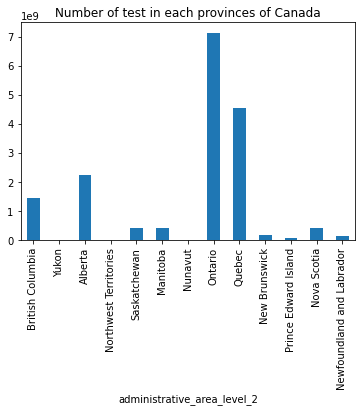

In [172]:
pro_test = canada.groupby('administrative_area_level_2').sum().tests
pro_test = pro_test.reindex(['British Columbia', 'Yukon', 'Alberta', 'Northwest Territories', 'Saskatchewan', 'Manitoba', 'Nunavut', 'Ontario', 'Quebec', 'New Brunswick', 'Prince Edward Island', 'Nova Scotia', 'Newfoundland and Labrador'])
pro_test.plot(kind='bar', title='Number of test in each provinces of Canada')
plt.show()

From the plot, we can find that Ontario is the province with the most test cases.

### <font color='#8B0000'> Q6 Create a bar plot that shows the number of tests conducted per 1000 people for each province in Canada.</font>
How would you interpret the results of this bar plot given the results of bar plot in question 5. 

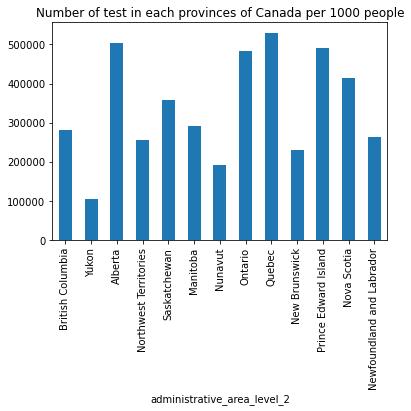

In [186]:
# put your code here
pro_test = canada.groupby('administrative_area_level_2').sum().tests
pro_pop = canada.groupby('administrative_area_level_2').mean().population
pro_test_1000 = pro_test*1000/pro_pop
pro_test_1000 = pro_test_1000.reindex(['British Columbia', 'Yukon', 'Alberta', 'Northwest Territories', 'Saskatchewan', 'Manitoba', 'Nunavut', 'Ontario', 'Quebec', 'New Brunswick', 'Prince Edward Island', 'Nova Scotia', 'Newfoundland and Labrador'])
pro_test_1000.plot(kind='bar', title='Number of test in each provinces of Canada per 1000 people')
plt.show()

This plot shows a different result with the above one. The provinces with few overall tests tend to have similar number of tests per 1000 people compared with the provinces with large overall tests. Ontario seems to have large population since it tests per 1000 people is not as large as its overall tests. Some provinces in Canada seems to have a little population, but the tests per 1000 people is also large.

### <font color='#8B0000'> Q7 Create a visualization that shows which Canadian province has the highest recovery rate. </font>
Recovery rate is calculated as the number of recovered cases divided by the number of confirmed cases.

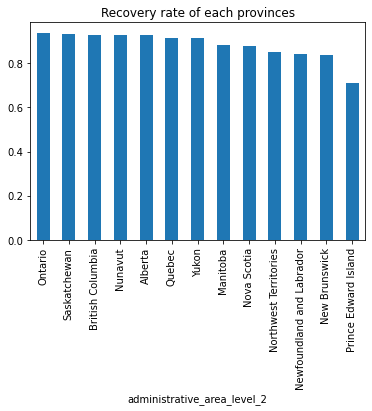

In [194]:
pro_con = canada.groupby('administrative_area_level_2').sum().confirmed
pro_rec = canada.groupby('administrative_area_level_2').sum().recovered
pro_rec_rate = pro_rec/pro_con
pro_rec_rate_sort = pro_rec_rate.sort_values(ascending=False)
pro_rec_rate_sort.plot(kind='bar', title='Recovery rate of each provinces')
plt.show()

From the plot, we can find that Ontario has the highest recovery rate.

### <font color='#8B0000'> Q8 Create visualizations that show the impacts of _at least_ three policy measures on mortality or infection rates.</font>


See https://covid19datahub.io/articles/doc/data.html for descriptions of the available policy measures.  You are not limited to histograms and bar charts.  Remember that you can use subplots!


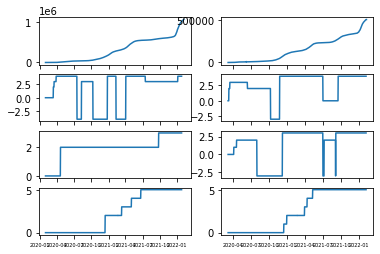

275192   -4.0
275193   -4.0
275194   -4.0
275195   -4.0
275196   -4.0
         ... 
275447   -4.0
275448   -4.0
275449   -4.0
275450   -4.0
275451   -4.0
Name: gatherings_restrictions, Length: 153, dtype: float64

In [267]:
ont = canada[canada['administrative_area_level_2']=='Ontario']
alb = canada[canada['administrative_area_level_2']=='Alberta']
f, axes = plt.subplots(4, 2,  sharex='col')
axes[0,0].plot(ont.date, ont.confirmed)
axes[1,0].plot(ont.date, ont.gatherings_restrictions)
axes[2,0].plot(ont.date, ont.facial_coverings)
axes[3,0].plot(ont.date, ont.vaccination_policy)
plt.sca(axes[3,0])
plt.xticks(fontsize=5)
axes[0,1].plot(alb.date, alb.confirmed)
axes[1,1].plot(alb.date, alb.gatherings_restrictions)
axes[2,1].plot(alb.date, alb.facial_coverings)
axes[3,1].plot(alb.date, alb.vaccination_policy)
plt.sca(axes[3,1])
plt.xticks(fontsize=5)
plt.show()
ont[ont.gatherings_restrictions<0].gatherings_restrictions

The three policy I would like to check the impact is the gathering restriction, facial coviering policy, and vaccination policy.\
Since the policy of each province may differ, I choose two provinces I think is the most represtative, which are Ontario and Alberta.\
I draw the subplots of two of them with the altogher confirmed case, rate of each of the policy.\
I find that some of the rate of the policy is negative. After I check the document, I find that it is impossible, so I think that might be the problem of the dataset. I would abs the data and draw the plot again.

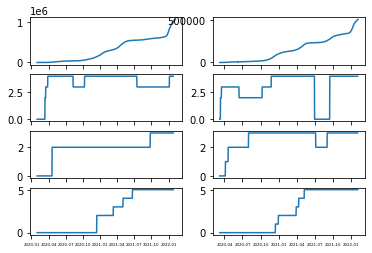

Series([], Name: gatherings_restrictions, dtype: float64)

In [273]:
canada.gatherings_restrictions = canada.gatherings_restrictions.abs()
canada.facial_coverings = canada.facial_coverings.abs()
canada.vaccination_policy = canada.vaccination_policy.abs()
ont = canada[canada['administrative_area_level_2']=='Ontario']
alb = canada[canada['administrative_area_level_2']=='Alberta']
f, axes = plt.subplots(4, 2,  sharex='col')
axes[0,0].plot(ont.date, ont.confirmed)
axes[1,0].plot(ont.date, ont.gatherings_restrictions)
axes[2,0].plot(ont.date, ont.facial_coverings)
axes[3,0].plot(ont.date, ont.vaccination_policy)
plt.sca(axes[3,0])
plt.xticks(fontsize=4)
axes[0,1].plot(alb.date, alb.confirmed)
axes[1,1].plot(alb.date, alb.gatherings_restrictions)
axes[2,1].plot(alb.date, alb.facial_coverings)
axes[3,1].plot(alb.date, alb.vaccination_policy)
plt.sca(axes[3,1])
plt.xticks(fontsize=4)
plt.show()
ont[ont.gatherings_restrictions<0].gatherings_restrictions

* For Ontario, the gathering restriction policy and facing covering policy are always on a high level from the April of 2020, and it seems not have an great impact on the confirmed cases. For the vaccination policy, we can see a obvious impact on the comfirmed cases. When the vaccination rate arrives 5, we can see the slope of the comfirmed cases greatly decrease at the same time, which means that it has great impact on the infection rate. The later increasement should because of Omicorn, which is an unexpected case.
* For Alberta, we can see the impact of the gatering restriction and facial covering policy. There are great decreasement of the rate of the gathering restriction and facial covering policy on Jan of 2021. At the same time, we see the slop of the comfirmed case has an increasement, which is before the arrive of Omicorn. For the vaccination policy, we can see a similar great impact on the comfirmed case as Ontario.

C:\Users\kaiya\AppData\Local\Temp/ipykernel_34492/3995699936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_con_yes['rates'] = pro_con_yes['confirmed']/pro_con_yes['population']


<BarContainer object of 13 artists>

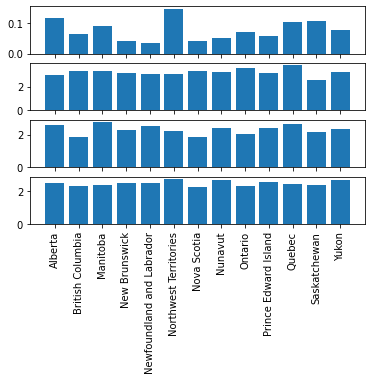

In [317]:
from datetime import datetime
f, axes = plt.subplots(4,  sharex='col')
canada.date
pro_con_yes = canada[canada.date == datetime(2022, 2, 6)]
pro_con_yes['rates'] = pro_con_yes['confirmed']/pro_con_yes['population']
rate = pro_con_yes.groupby('administrative_area_level_2').mean().rates
axes[0].bar(pro_con_yes.groupby('administrative_area_level_2').mean().index, rate)
plt.xticks(rotation=90)
pro_gat = canada.groupby('administrative_area_level_2').mean().gatherings_restrictions
axes[1].bar(pro_con_yes.groupby('administrative_area_level_2').mean().index, pro_gat)
pro_fac = canada.groupby('administrative_area_level_2').mean().facial_coverings
axes[2].bar(pro_con_yes.groupby('administrative_area_level_2').mean().index, pro_fac)
pro_vac = canada.groupby('administrative_area_level_2').mean().vaccination_policy
axes[3].bar(pro_con_yes.groupby('administrative_area_level_2').mean().index, pro_vac)

I check the infected rate of each provinces and the corresponding mean value of the three policy.\
We can see that provinces with a comparatively low infected rate generally have a high rate of all of the three policy, except Notherwest. I think this is also related to the population, so I think some other effect can make the data biased.

## <font color='green'> Please submit your completed notebook in .IPYNB and .HTML formats via Canvas </font>